In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('BostonHousing.csv')
# data = pd.df(df.data, columns=df.feature_names)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
num_samples = df.shape[0]
num_features = df.shape[1]
print(num_samples)
print(num_features)

506
14


In [ ]:
numerical_summary = df.describe()
print(numerical_summary)

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [ ]:
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


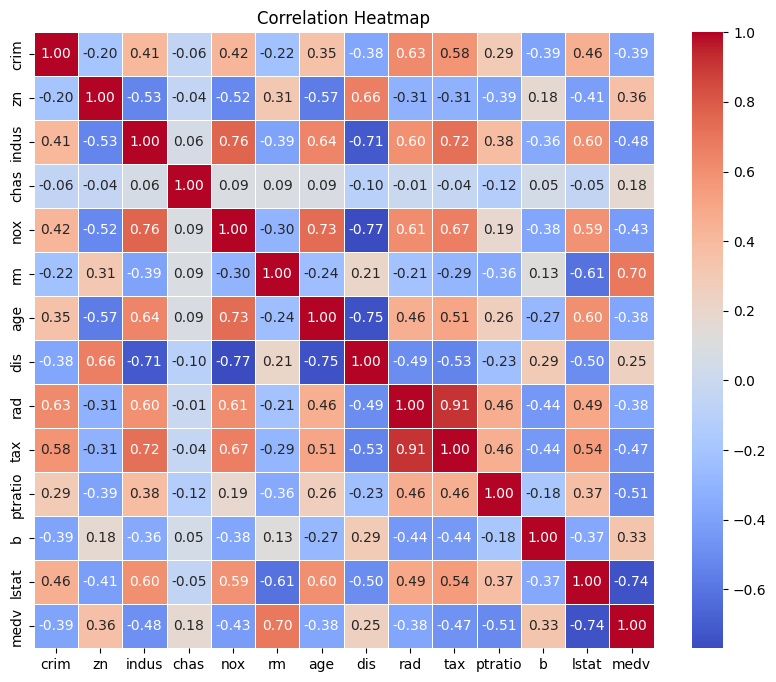

In [ ]:
correlation_matrix = df.corr()
# print("Correlation matrix:\n", correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5) #The annot=True parameter adds the correlation values inside the heatmap
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
target_corr = correlation_matrix['medv'].drop('medv')  # Exclude self-correlation
strongest_feature = target_corr.abs().idxmax()
strongest_value = target_corr[strongest_feature]
print(f"\nFeature with strongest correlation to MEDV: {strongest_feature} ({strongest_value:.2f})")



Feature with strongest correlation to MEDV: lstat (-0.74)


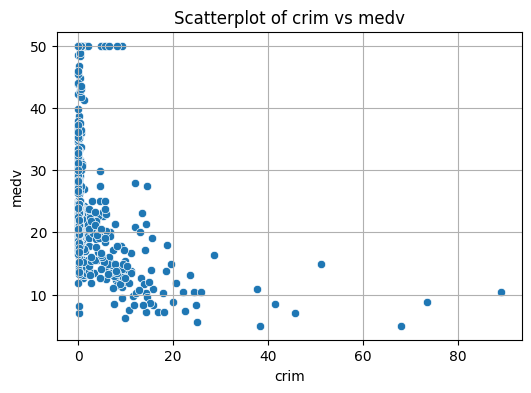

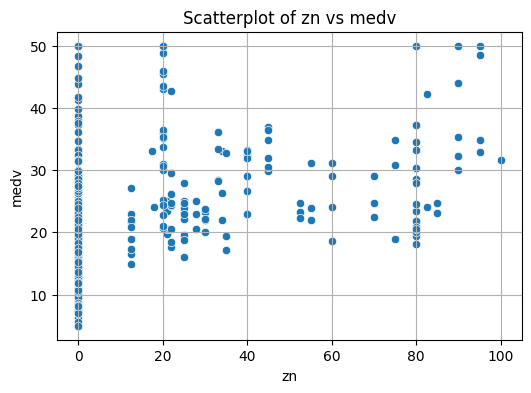

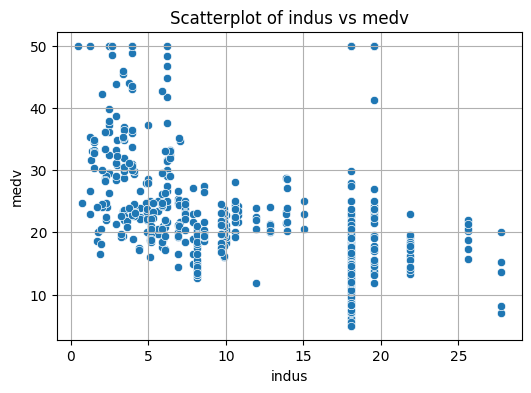

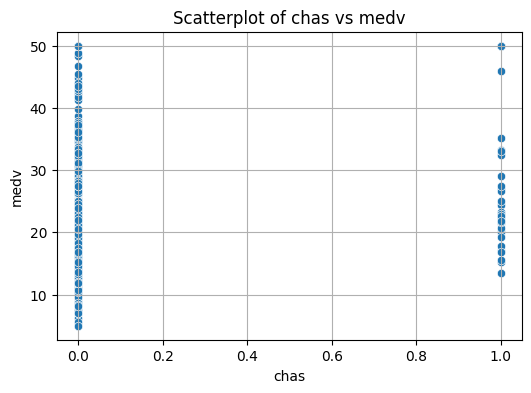

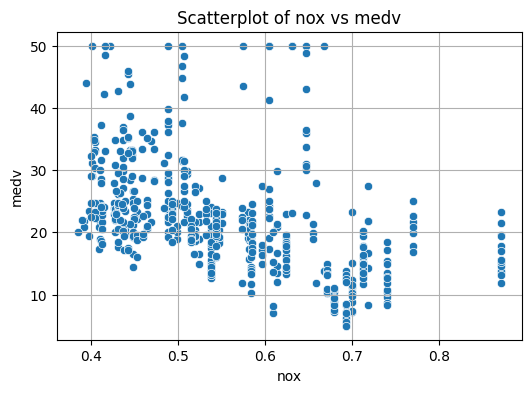

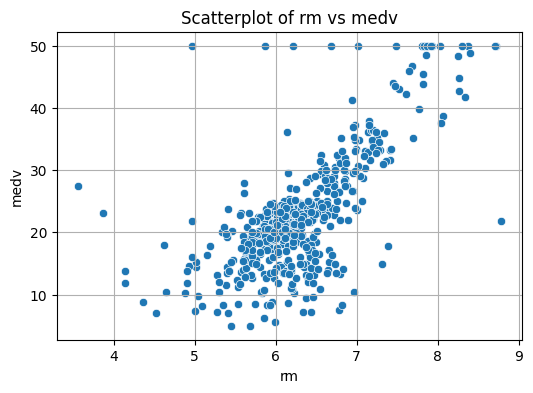

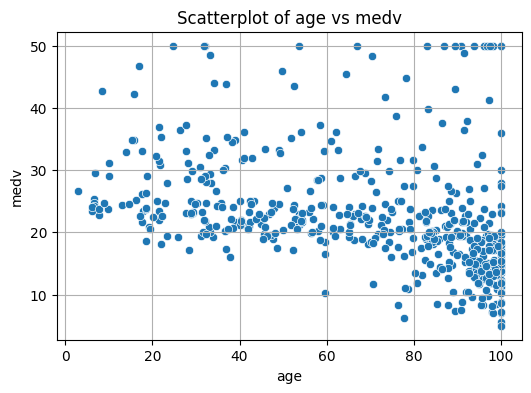

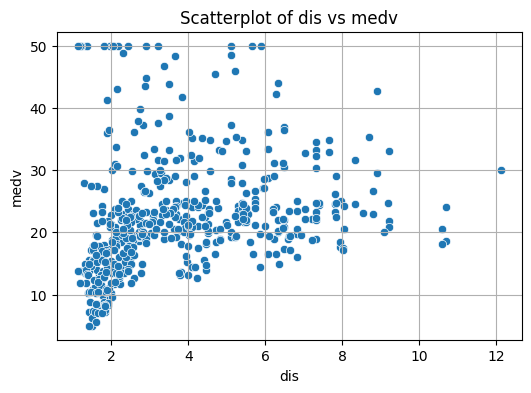

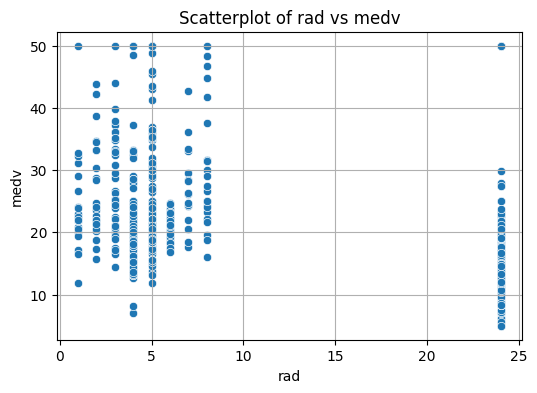

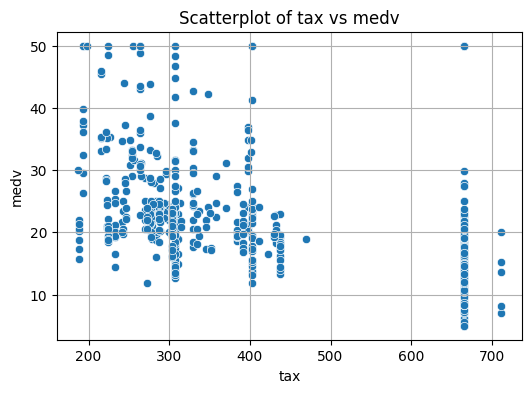

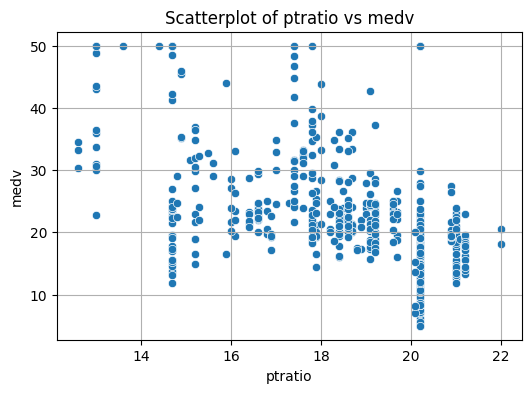

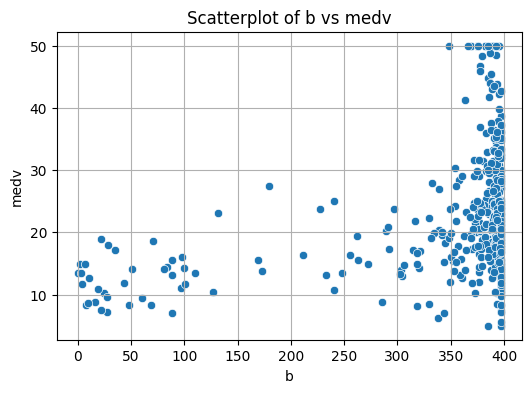

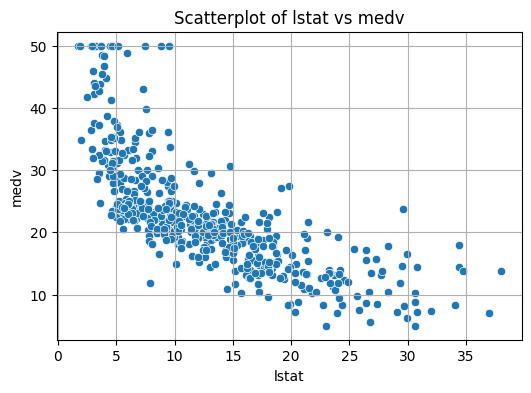

In [ ]:
target = 'medv'  # Target variable
features = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat']  # List of features to analyze

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=feature, y=target)
    plt.title(f'Scatterplot of {feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.grid(True)
    plt.show()

Features like rm and lstat are often the most strongly correlated with medv

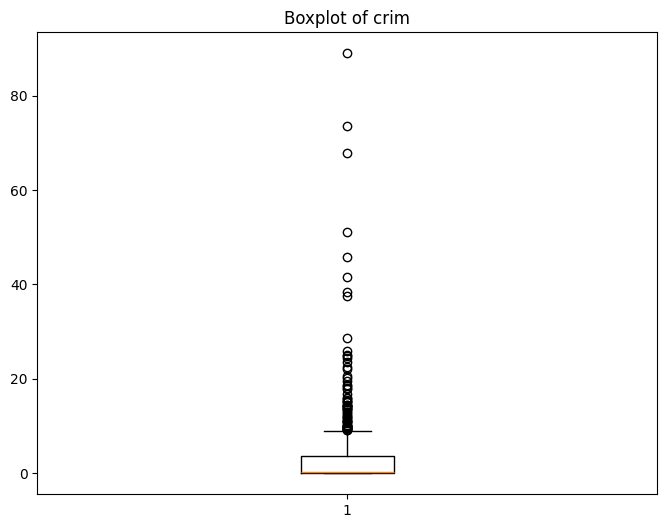

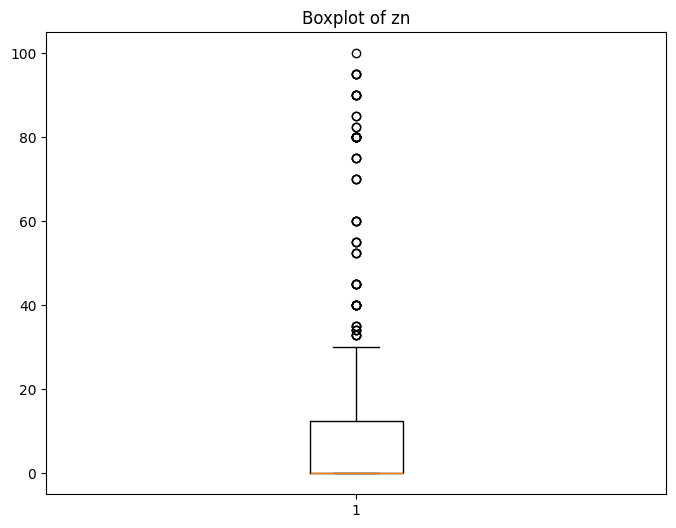

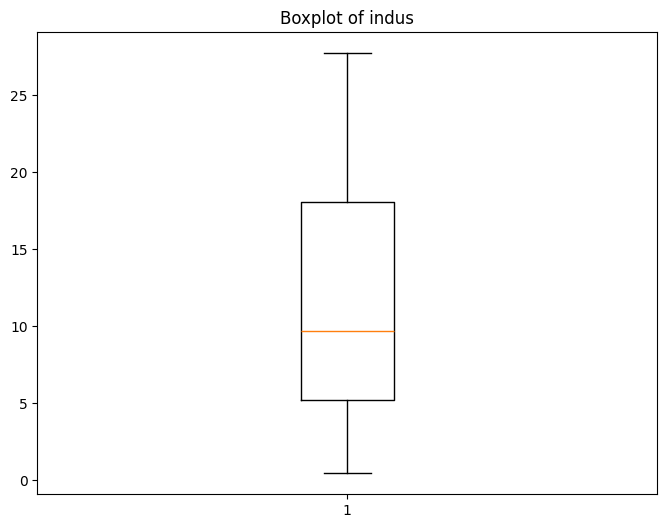

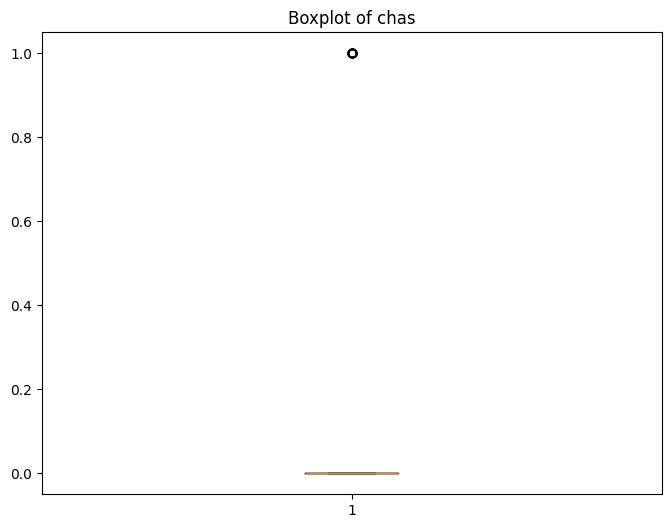

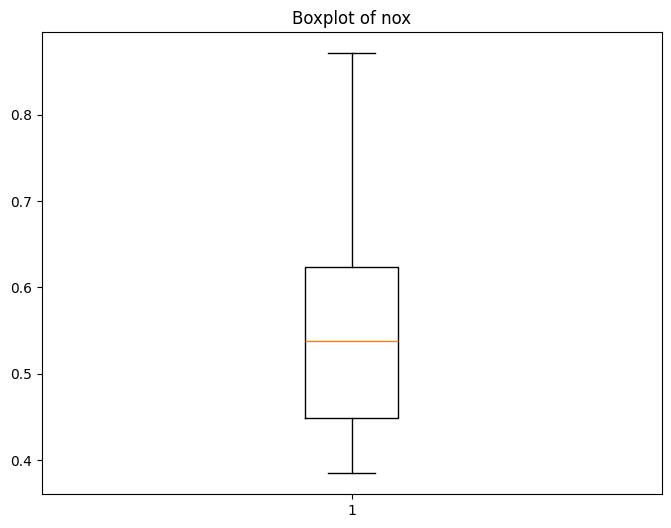

Column: crim, Outlier Percentage: 13.04%
Column: zn, Outlier Percentage: 13.44%
Column: chas, Outlier Percentage: 6.92%


In [ ]:
def detect_outliers_iqr(df):
    Q1 = np.percentile(df, 25)
    Q3 = np.percentile(df, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df < lower_bound) | (df > upper_bound)]
    return outliers


# Find the first five columns with high outlier values and visualize them
outlier_cols = []
for col in df.columns[:5]:  # Consider only the first five columns
    outliers = detect_outliers_iqr(df[col])
    if len(outliers) > 0 :
        outlier_cols.append(col)

    plt.figure(figsize=(8, 6))
    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


# Calculate outlier percentages for the found columns
for col in outlier_cols:
    outliers = detect_outliers_iqr(df[col])
    outlier_percentage = (len(outliers) / len(df[col])) * 100
    print(f"Column: {col}, Outlier Percentage: {outlier_percentage:.2f}%")

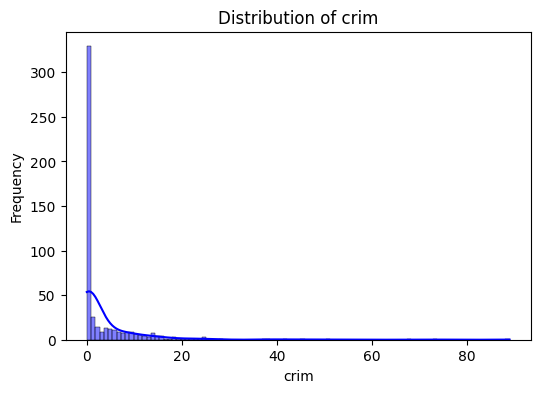

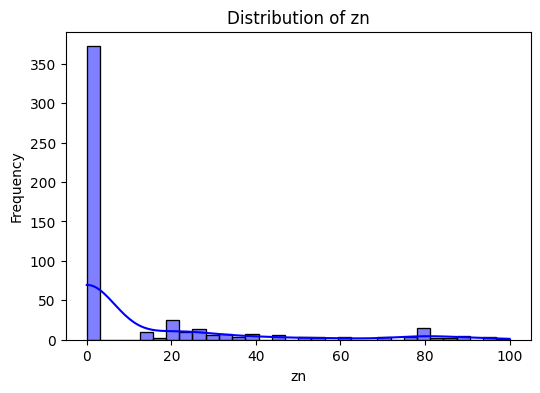

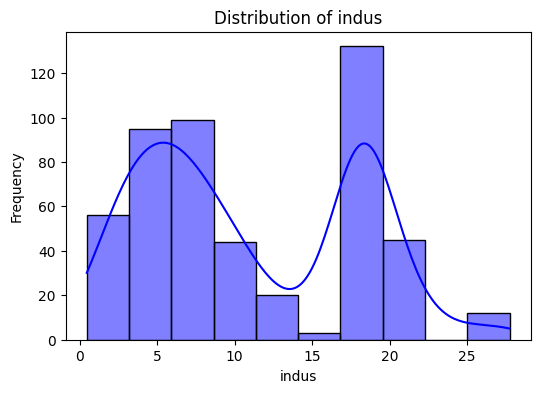

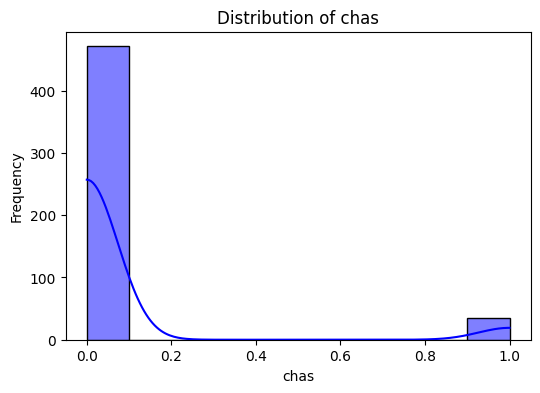

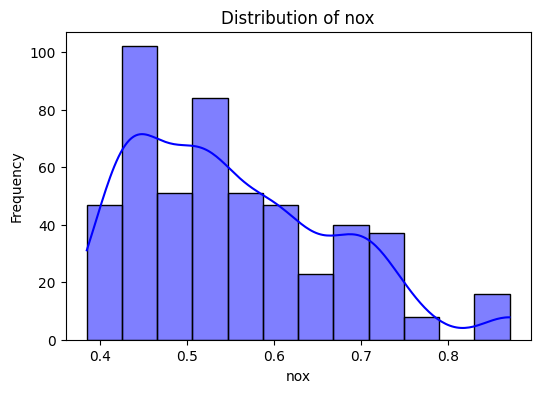

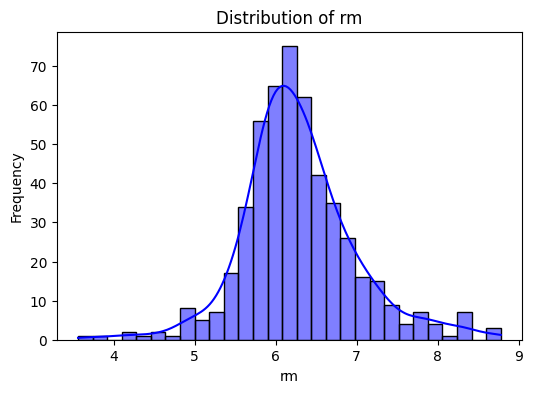

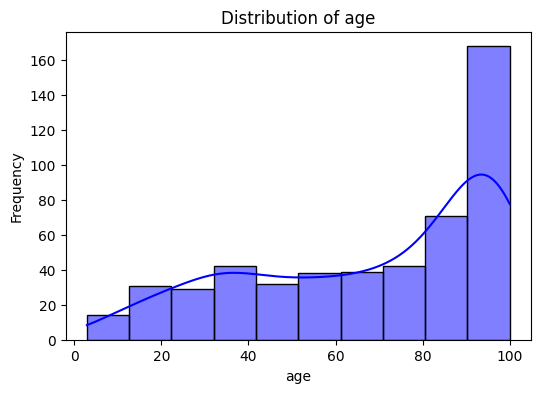

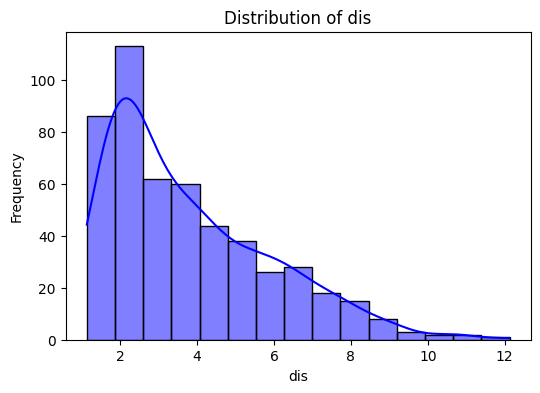

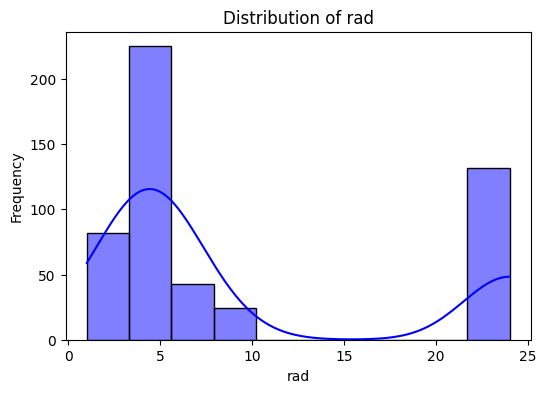

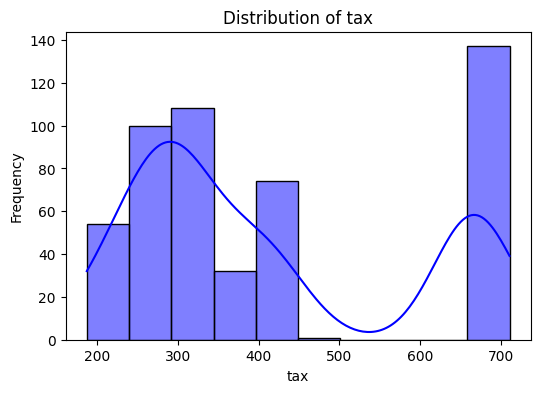

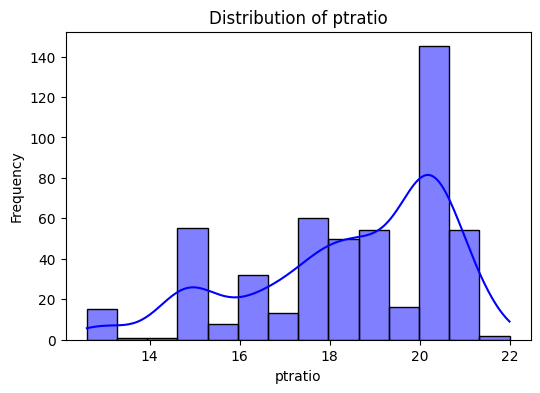

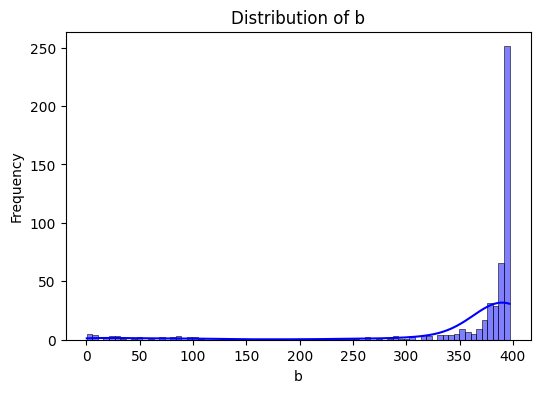

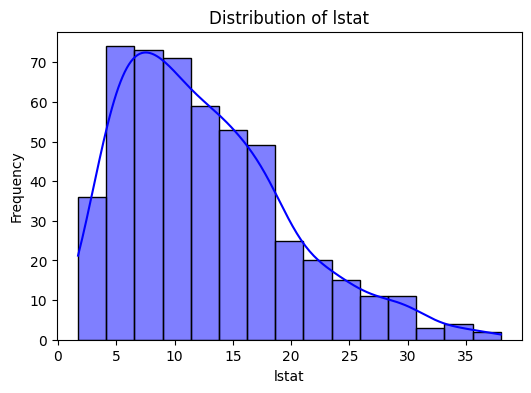

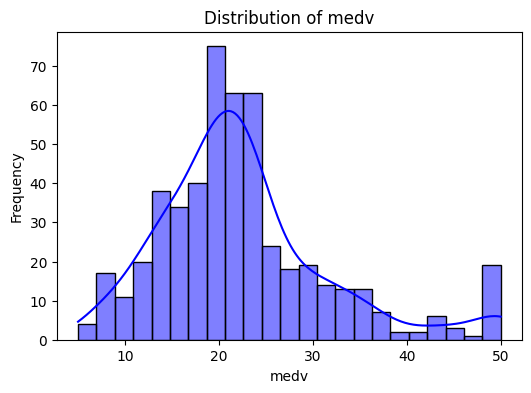

In [ ]:
#Finding skewness
def plot_histograms(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for column in numeric_cols:
        plt.figure(figsize=(6, 4))
        sns.histplot(df[column], kde=True, color='blue')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

# Example usage
plot_histograms(df)

Skewness of each column:
crim       5.223149
zn         2.225666
indus      0.295022
chas       3.405904
nox        0.729308
rm         0.403612
age       -0.598963
dis        1.011781
rad        1.004815
tax        0.669956
ptratio   -0.802325
b         -2.890374
lstat      0.906460
medv       1.108098
dtype: float64
Highly skewed columns: Index(['crim', 'zn', 'chas', 'dis', 'rad', 'b', 'medv'], dtype='object')
Skewness after log transformation:
crim    1.269201
zn      1.193451
chas    3.405904
dis     0.331561
rad     0.532760
b      -4.459061
medv   -0.241244
dtype: float64


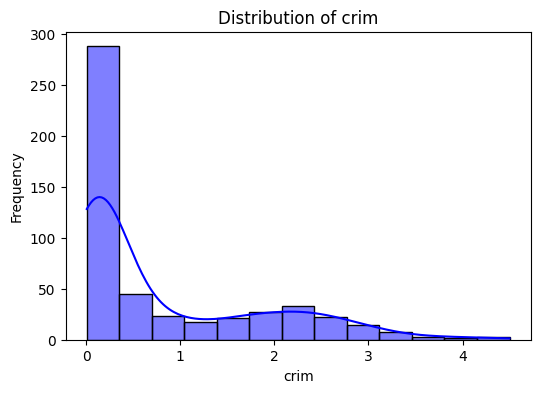

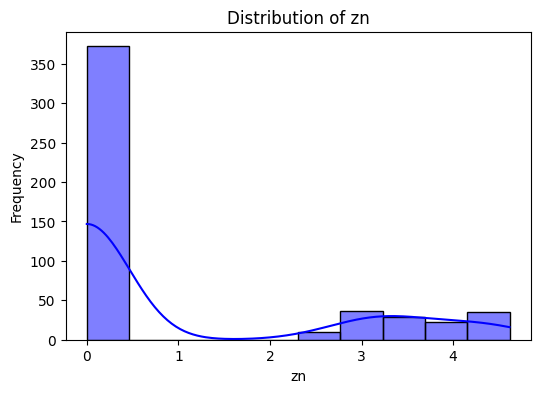

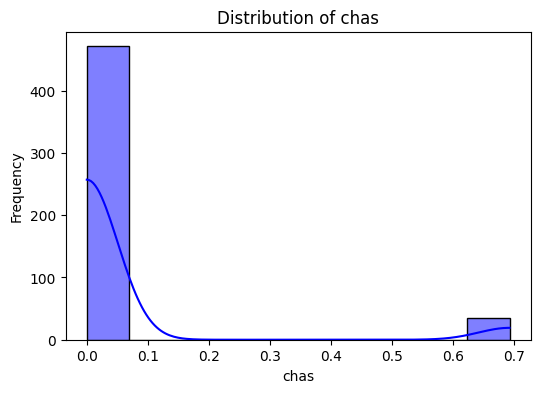

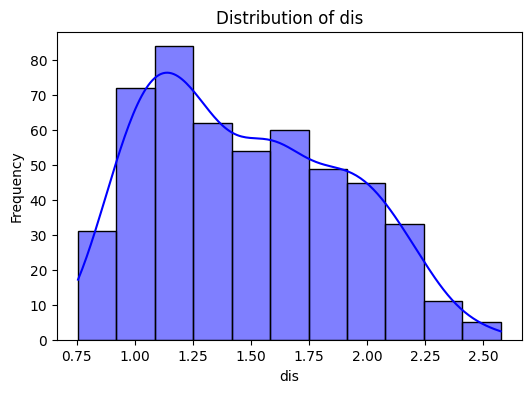

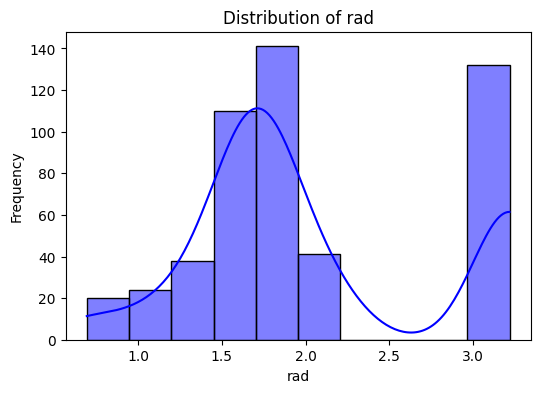

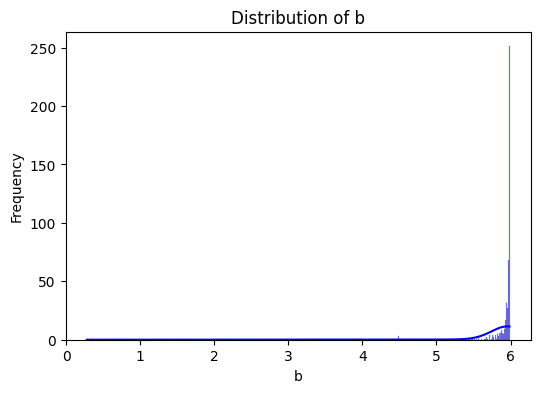

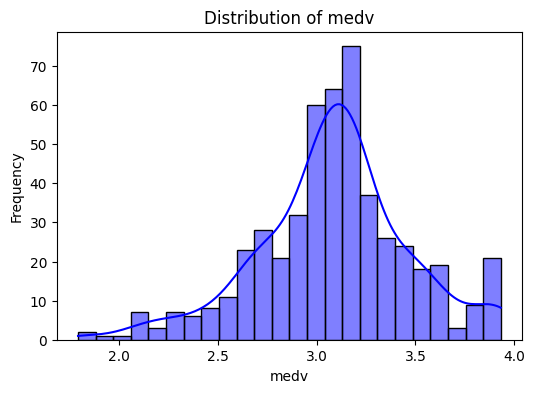

In [ ]:
#Removing skewness
skewness = df.select_dtypes(include=['float64', 'int64']).skew()
print("Skewness of each column:")
print(skewness)

# Identify highly skewed columns (e.g., skewness > 1 or < -1)
highly_skewed_columns = skewness[abs(skewness) > 1].index
print("Highly skewed columns:", highly_skewed_columns)
for column in highly_skewed_columns:
    # Add 1 to avoid log(0) issues for non-negative values
    df[column] = np.log1p(df[column])

# Recalculate skewness to verify improvement
new_skewness = df[highly_skewed_columns].skew()
print("Skewness after log transformation:")
print(new_skewness)
plot_histograms(df[highly_skewed_columns])

In [ ]:
#To remove outliers of lstat and medv
target='medv'
features=['lstat','medv']
#columns_to_process = ['LSTAT', 'MEDV']

# Function to calculate IQR bounds and remove outliers
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile (Q1)
        Q3 = df[col].quantile(0.75)  # 75th percentile (Q3)
        IQR = Q3 - Q1  # Interquartile Range (IQR)
        lower_bound = Q1 - 1.5 * IQR  # Lower bound
        upper_bound = Q3 + 1.5 * IQR  # Upper bound
        # Filter out rows with outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers in the specified columns
cleaned_boston_df = remove_outliers_iqr(df, features)

# Output the number of rows before and after outlier removal
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", cleaned_boston_df.shape)

Original dataset shape: (506, 14)
Cleaned dataset shape: (453, 14)


Removing outliers can improve model performance, but it depends on several factors, including the nature of the dataset, the type of model, and the influence of the outliers on the relationships between features and the target variable

In [ ]:
#Adding features
#data = pd.DataFrame(df.data, columns=df.feature_names)
#df['MEDV'] = df.target

# Feature engineering
df['lstat_squared'] = df['lstat'] ** 2
df['rm_to_lstat'] = df['rm'] / df['lstat']
df['log_crim'] = df['crim'].apply(lambda x: np.log(x + 1))  # Add 1 to avoid log(0)
df['tax_to_ptratio'] = df['tax'] / df['ptratio']
df['high_tax_area'] = (df['tax'] > df['tax'].median()).astype(int)
df['affordability'] = df['medv'] / (df['tax'] + df['ptratio'])

# Display the updated DataFrame with new features
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,lstat_squared,rm_to_lstat,log_crim,tax_to_ptratio,high_tax_area,affordability
0,0.006300,2.944439,2.31,0.0,0.538,6.575,65.2,1.627278,0.693147,296,15.3,5.986201,4.98,3.218876,24.8004,1.320281,0.006280,19.346405,0,0.010340
1,0.026944,0.000000,7.07,0.0,0.469,6.421,78.9,1.786261,1.098612,242,17.8,5.986201,9.14,3.117950,83.5396,0.702516,0.026587,13.595506,0,0.012001
2,0.026924,0.000000,7.07,0.0,0.469,7.185,61.1,1.786261,1.098612,242,17.8,5.975919,4.03,3.575151,16.2409,1.782878,0.026568,13.595506,0,0.013761
3,0.031857,0.000000,2.18,0.0,0.458,6.998,45.8,1.954757,1.386294,222,18.7,5.980479,2.94,3.538057,8.6436,2.380272,0.031360,11.871658,0,0.014699
4,0.066770,0.000000,2.18,0.0,0.458,7.147,54.2,1.954757,1.386294,222,18.7,5.986201,5.33,3.616309,28.4089,1.340901,0.064636,11.871658,0,0.015024


Yes, feature engineering can significantly improve a model's performance. Engineered features can help capture relationships, patterns, and insights from the data that may not be directly evident in the raw features

In [ ]:
#Applying linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = df.drop(columns=['medv'])  # Features (exclude the target column)
y = df['medv']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model using MSE and R² score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 0.022343174807115992
R² Score: 0.8389071866155366


In [ ]:
#Applying polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a pipeline with PolynomialFeatures (degree=2) and LinearRegression
poly_reg_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Train the Polynomial Regression model
poly_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_poly = poly_reg_model.predict(X_test)

# Evaluate the Polynomial Regression model using MSE and R² score
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Output the results
print(f"Polynomial Regression (Degree 2) - Mean Squared Error (MSE): {mse_poly}")
print(f"Polynomial Regression (Degree 2) - R² Score: {r2_poly}")


Polynomial Regression (Degree 2) - Mean Squared Error (MSE): 1.1568111356468518e-23
Polynomial Regression (Degree 2) - R² Score: 1.0


Here Mean Squared error is reduced.it means it fits the data better than Linear Regression and R^2 Score increases so it it suggests a better fit to the data

In [ ]:
#Implementation of lasso and ridge regression
from sklearn.linear_model import Ridge, Lasso
X = df.drop(columns=['medv'])
y = df['medv']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # alpha controls regularization strength
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)  # alpha controls regularization strength
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Evaluate Lasso Regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print results
print("Ridge Regression:")
print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"R² Score: {r2_ridge}")

print("\nLasso Regression:")
print(f"Mean Squared Error (MSE): {mse_lasso}")
print(f"R² Score: {r2_lasso}")

Ridge Regression:
Mean Squared Error (MSE): 0.030427695008492198
R² Score: 0.7806183303833222

Lasso Regression:
Mean Squared Error (MSE): 0.04040886139618385
R² Score: 0.7086547805238099


Linear regression performs best because of lower Mean Squared Error

In [ ]:
#Comparing all models
model_performance = {
    "Model": ["Linear Regression", "Polynomial Regression", "Ridge Regression", "Lasso Regression"],
    "MSE": [mse, mse_poly, mse_ridge, mse_lasso],
    "R² Score": [r2, r2_poly, r2_ridge, r2_lasso],
}

# Convert to a DataFrame for better visualization
performance_df = pd.DataFrame(model_performance)

# Display the results
print(performance_df)

                   Model           MSE  R² Score
0      Linear Regression  2.234317e-02  0.838907
1  Polynomial Regression  1.156811e-23  1.000000
2       Ridge Regression  3.042770e-02  0.780618
3       Lasso Regression  4.040886e-02  0.708655


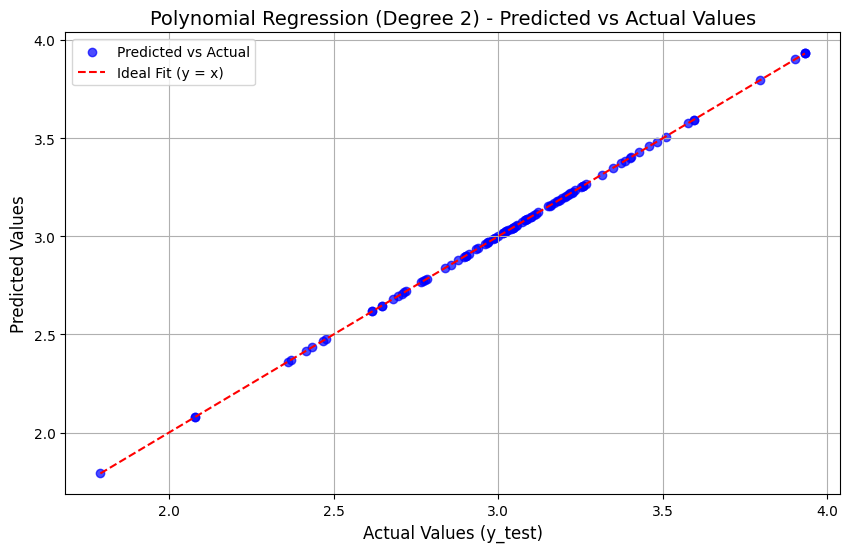

In [ ]:
#Visualisation of actual vs predicted values
#Train a Polynomial Regression model (degree=2)
poly_reg_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_reg_model.fit(X_train, y_train)
y_pred_poly = poly_reg_model.predict(X_test)

# Evaluate Polynomial Regression
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Visualize the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.7, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit (y = x)")

plt.title("Polynomial Regression (Degree 2) - Predicted vs Actual Values", fontsize=14)
plt.xlabel("Actual Values (y_test)", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

The blue points represent the predicted values from the model plotted against the actual target values from the test set.

The red dashed line (y = x) indicates the ideal fit, where predictions match the actual values perfectly.